<a href="https://colab.research.google.com/github/rohit28900/Epilepsy_project/blob/main/epilepsy_project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the CHB-MIT dataset**

In [ ]:
!wget -r -N -c -np https://physionet.org/files/chbmit/1.0.0/chb01/

In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

In [ ]:
!pip install mne

In [ ]:
!pip install antropy

**importing Libraries**

In [ ]:
import os
import glob
import mne
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import mean
from scipy import signal
from scipy.stats import kurtosis, skew
from scipy.signal import argrelextrema, welch
from scipy.integrate import cumtrapz
import statistics as s 
import antropy as ant
import time
import csv
import math
import pyeeg

In [ ]:
folder = (r"/content/physionet.org/files/chbmit/1.0.0/chb01")
files = [file for file in os.listdir(folder) if file.endswith(".edf")]
print(files)

['chb01_12.edf', 'chb01_02.edf', 'chb01_19.edf', 'chb01_37.edf', 'chb01_34.edf', 'chb01_16.edf', 'chb01_20.edf', 'chb01_25.edf', 'chb01_30.edf', 'chb01_23.edf', 'chb01_40.edf', 'chb01_17.edf', 'chb01_38.edf', 'chb01_15.edf', 'chb01_14.edf', 'chb01_01.edf', 'chb01_26.edf', 'chb01_46.edf', 'chb01_39.edf', 'chb01_43.edf', 'chb01_06.edf', 'chb01_07.edf', 'chb01_05.edf', 'chb01_08.edf', 'chb01_29.edf', 'chb01_10.edf', 'chb01_13.edf', 'chb01_36.edf', 'chb01_31.edf', 'chb01_11.edf', 'chb01_42.edf', 'chb01_04.edf', 'chb01_09.edf', 'chb01_18.edf', 'chb01_27.edf', 'chb01_32.edf', 'chb01_22.edf', 'chb01_24.edf', 'chb01_21.edf', 'chb01_41.edf', 'chb01_03.edf', 'chb01_33.edf']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import re
 # printing original list
print("The original list is : " + str(files))
 
files.sort(key=lambda files : list(
    map(int, re.findall(r'\d+', files)))[1])
 
# printing result
print("Strings after numerical Sort  : " + str(files))

The original list is : ['chb06_04.edf', 'chb06_17.edf', 'chb06_16.edf', 'chb06_07.edf', 'chb06_08.edf', 'chb06_09.edf', 'chb06_14.edf', 'chb06_06.edf', 'chb06_03.edf', 'chb06_13.edf', 'chb06_18.edf', 'chb06_05.edf', 'chb06_12.edf', 'chb06_15.edf', 'chb06_01.edf', 'chb06_24.edf', 'chb06_10.edf', 'chb06_02.edf']
Strings after numerical Sort  : ['chb06_01.edf', 'chb06_02.edf', 'chb06_03.edf', 'chb06_04.edf', 'chb06_05.edf', 'chb06_06.edf', 'chb06_07.edf', 'chb06_08.edf', 'chb06_09.edf', 'chb06_10.edf', 'chb06_12.edf', 'chb06_13.edf', 'chb06_14.edf', 'chb06_15.edf', 'chb06_16.edf', 'chb06_17.edf', 'chb06_18.edf', 'chb06_24.edf']


In [ ]:
len(files)

18

In [ ]:
Sizures1=['chb01_03.edf','chb01_04.edf','chb01_15.edf','chb01_16.edf','chb01_18.edf','chb01_21.edf','chb01_26.edf']

In [ ]:
Sizures6=['chb06_01.edf','chb06_01.edf','chb06_01.edf','chb06_04.edf','chb06_04.edf','chb06_09.edf','chb06_10.edf','chb06_13.edf','chb06_18.edf','chb06_24.edf']

In [ ]:
Sizures7=['chb06_01.edf']

In [ ]:
!pip install ipdb

In [ ]:
sizure_time = pd.read_excel('/content/drive/MyDrive/Rohit Data Set/Sizure_index_06.xlsx')

In [ ]:
sizure_index = sizure_time.rename(columns = {'Unnamed: 0': 'patient_file'}, inplace = False)

In [ ]:
sizure_index

,patient_file,Start time,Stop time,start_index,stop_index
0,chb06_01.edf,1724,1738,431000,434500
1,chb06_01.edf,7461,7476,1865250,1869000
2,chb06_01.edf,13525,13540,3381250,3385000
3,chb06_04.edf,327,347,81750,86750
4,chb06_04.edf,6211,6231,1552750,1557750
5,chb06_09.edf,12500,12516,3125000,3129000
6,chb06_10.edf,10833,10845,2708250,2711250
7,chb06_13.edf,506,519,126500,129750
8,chb06_18.edf,7799,7811,1949750,1952750
9,chb06_24.edf,9387,9403,2346750,2350750


In [ ]:
patient_dict= {'chb01_03.edf':(749000,759000), 'chb01_04.edf':(366750,373500),'chb01_15.edf':(433000,443000),'chb01_16.edf':(253750,266500),'chb01_18.edf':(430000,452500),'chb01_21.edf':(81750,105000),'chb01_26.edf':(465500,490750)}

In [ ]:
patient_dict_06= {'chb06_01.edf':([431000,434500]),'chb06_04.edf':([81750,86750],[1552750,1557750]),'chb06_09.edf':(3125000,3129000),'chb06_10.edf':([2708250,2711250]),'chb06_13.edf':(126500,129750),'chb06_18.edf':(1949750,1952750),'chb06_24.edf':(2346750,2350750)}

In [ ]:
#,[1865250,1869000],[3381250,3385000]
patient_dict_06

{'chb06_01.edf': [431000, 434500],
 'chb06_04.edf': ([81750, 86750], [1552750, 1557750]),
 'chb06_09.edf': (3125000, 3129000),
 'chb06_10.edf': [2708250, 2711250],
 'chb06_13.edf': (126500, 129750),
 'chb06_18.edf': (1949750, 1952750),
 'chb06_24.edf': (2346750, 2350750)}

In [ ]:
 index = patient_dict_06['chb06_04.edf']

In [ ]:
index[0]

[81750, 86750]

In [ ]:
#reading the CHB-MIT data
import ipdb
f="/content/physionet.org/files/chbmit/1.0.0/chb06/"
patient_data = pd.DataFrame()
for i in range(0,len(files)):

  loc = (f+files[i])
  #for j in range(0,len(Sizures)):
  #sizure = (f+Sizures[j])
  raw = mne.io.read_raw_edf(loc, preload=True)
  temp = raw.to_data_frame()
  temp['label'] = 0
  
  #ipdb.set_trace(context=6)
  if(files[i] in Sizures7):

    index = patient_dict_06[files[i]]

    if len(index) == 2:    
      temp['label'].iloc[index[0]:index[1]] = 1

    if len(index) > 2:
      for i in range(0,len(index)):
        temp['label'].iloc[index[i][0]:index[i][0]] = 1
    #ipdb.set_trace(context=6)
  

    
  patient_data = pd.concat([patient_data,temp], axis=0)
      




  #ipdb.set_trace(context=6)
  #header = ','.join(raw.ch_names)
  #np.savetxt('chb01.csv', raw.get_data().T, delimiter=',', header=header)
  #i+=1






Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693311  =      0.000 ... 14426.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3394815  =      0.000 ... 13260.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 775679  =      0.000 ...  3029.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2029567  =      0.000 ...  7927.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



Extracting EDF parameters from /content/physionet.org/files/chbmit/1.0.0/chb06/chb06_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


<ipython-input-20-2d7e7279ef52>:10: RuntimeWarning:

Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.



In [ ]:
raw.plot_psd(fmax=60)
raw.plot(duration=50, n_channels=2);

NameError: ignored

In [ ]:
temp.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,label
595195,2324980,37.313797,11.526252,-7.619048,18.168498,41.221001,3.711844,-9.572650,24.420024,10.354090,6.056166,-9.181929,-23.247863,-29.890110,-29.499389,29.890110,13.870574,29.890110,-45.518926,8.009768,-28.717949,-56.459096,-4.493284,29.890110,0
595196,2324984,27.545788,9.963370,-8.400488,13.089133,36.923077,0.195360,-10.354090,15.042735,13.479853,0.586081,-3.711844,-30.280830,-29.108669,-37.704518,27.936508,19.340659,24.810745,-49.035409,8.791209,-25.592186,-64.273504,-8.791209,27.936508,0
595197,2324988,27.155067,4.884005,-11.135531,14.261294,36.923077,0.586081,-14.261294,11.526252,3.321123,0.195360,-1.367521,-16.996337,-38.095238,-50.989011,46.300366,25.982906,15.824176,-38.876679,11.526252,-18.559219,-77.557998,-17.777778,46.300366,0
595198,2324992,29.108669,2.539683,-11.916972,11.135531,41.611722,2.930403,-17.777778,3.321123,-0.586081,2.148962,1.367521,-11.526252,-43.174603,-57.631258,64.273504,28.327228,9.963370,-32.234432,12.307692,-16.605617,-86.935287,-23.247863,64.273504,0
595199,2324996,31.452991,0.976801,-15.433455,10.744811,49.035409,0.195360,-18.559219,-3.321123,-0.195360,-0.195360,2.539683,-8.791209,-45.909646,-62.319902,55.677656,45.518926,5.274725,-27.936508,15.824176,-17.777778,-94.358974,-22.075702,55.677656,0


In [ ]:
patient_data.tail()

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,C4-P4,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,label
595195,2324980,37.313797,11.526252,-7.619048,18.168498,41.221001,3.711844,-9.572650,24.420024,10.354090,6.056166,-9.181929,-23.247863,-29.890110,-29.499389,29.890110,13.870574,29.890110,-45.518926,8.009768,-28.717949,-56.459096,-4.493284,29.890110,0
595196,2324984,27.545788,9.963370,-8.400488,13.089133,36.923077,0.195360,-10.354090,15.042735,13.479853,0.586081,-3.711844,-30.280830,-29.108669,-37.704518,27.936508,19.340659,24.810745,-49.035409,8.791209,-25.592186,-64.273504,-8.791209,27.936508,0
595197,2324988,27.155067,4.884005,-11.135531,14.261294,36.923077,0.586081,-14.261294,11.526252,3.321123,0.195360,-1.367521,-16.996337,-38.095238,-50.989011,46.300366,25.982906,15.824176,-38.876679,11.526252,-18.559219,-77.557998,-17.777778,46.300366,0
595198,2324992,29.108669,2.539683,-11.916972,11.135531,41.611722,2.930403,-17.777778,3.321123,-0.586081,2.148962,1.367521,-11.526252,-43.174603,-57.631258,64.273504,28.327228,9.963370,-32.234432,12.307692,-16.605617,-86.935287,-23.247863,64.273504,0
595199,2324996,31.452991,0.976801,-15.433455,10.744811,49.035409,0.195360,-18.559219,-3.321123,-0.195360,-0.195360,2.539683,-8.791209,-45.909646,-62.319902,55.677656,45.518926,5.274725,-27.936508,15.824176,-17.777778,-94.358974,-22.075702,55.677656,0


In [ ]:
 siz = list(np.where(patient_data["label"] == 1))

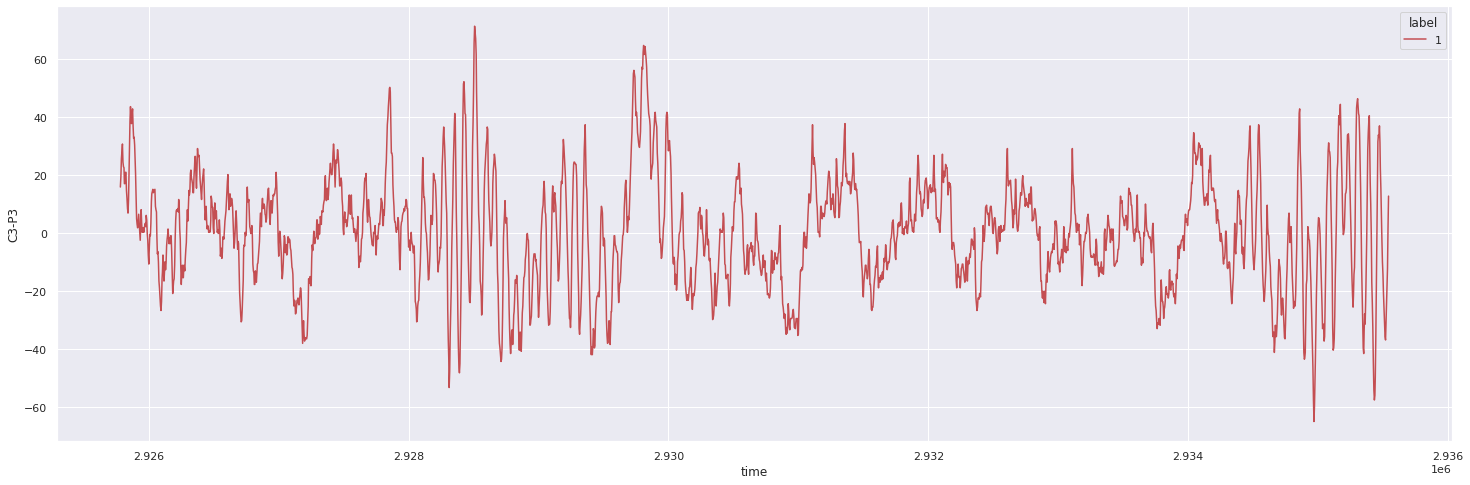

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
# Plot the responses for different events and regions
sns.lineplot(x ="time",y="C3-P3",hue='label',palette=['r'],
             data=patient_data[2592200:2594700])
fig.savefig('C3-P3_2500_1')

In [ ]:
patient_data.shape

(23395328, 25)

In [ ]:
patient_data['label'].value_counts()

0    23284828
1      110500
Name: label, dtype: int64

In [ ]:
#print(patient_data['label'].where(patient_data['label'] == 1))
exists = 1 in patient_data.label
print(exists)


True


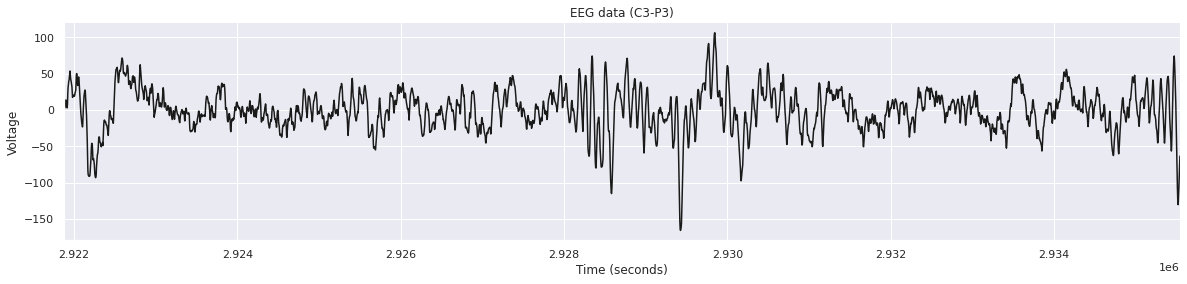

In [ ]:
data =(patient_data['F3-C3'][2591200:2594700])
time = (patient_data['time'][2591200:2594700])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
plt.xlim([time.min(), time.max()])
plt.title('EEG data (C3-P3)')
sns.despine()
#plt.savefig('seizure_eeg')

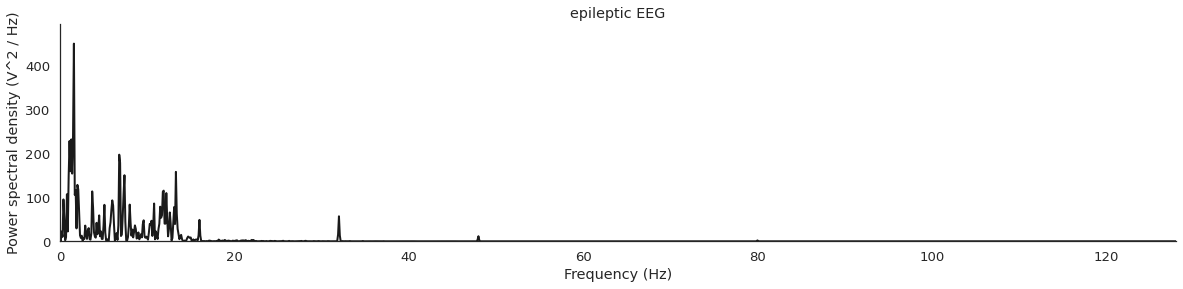

In [ ]:
from scipy import signal
import math
# Define window length (10 seconds)
sf = 256
win = 10 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(20, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
#plt.xlim([0,100])
plt.title("epileptic EEG")
plt.xlim([0, freqs.max()])
sns.despine()
plt.savefig('psd_sizure_eeg')

In [ ]:
len(psd)
#len(freqs)

1281

In [ ]:
def countOccurrences(arr):
    a = 0
    b = 0
    res = 0
    for i in range(len(arr)):
        if 0 == arr[i]:
          a += 1
        
        elif 1 ==arr[i]:
          b +=1
          if a>=b:
            res =0
          else: 
            res =1

    return res

In [ ]:
#channels = ['F7-T7',' T7-P7','P7-O1', 'FP1-F3','F3-C3','C3-P3','P3-O1','FP2-F4','F4-C4','C4-P4','P4-O2','FP2-F8','F8-T8','P8-O2','FZ-CZ',
#'CZ-PZ','P7-T7','T7-FT9','FT9-FT10', 'FT10-T8','T8-P8','FP1-F7']

In [ ]:
import math

In [ ]:
import ipdb
def mean_eeg(ep):
  #eeg_mean = []
  #ipdb.set_trace(context=6)
  df1 = mean(ep)
  #eeg_mean.append(df1)
  return df1


In [ ]:
def median_eeg(df):
  eeg_median = []
  df1 = s.median(df)
  eeg_median.append(df1)

  return eeg_median

In [ ]:
def mean_variance(df):
    variance_vals = np.var(df)
    return np.mean(variance_vals)

In [ ]:
def mean_kurtosis(df):
    kurtosis_vals = kurtosis(df)
    return np.mean(kurtosis_vals)

In [ ]:
def mean_skewness(df):
    skew_vals = skew(df)
    return np.mean(skew_vals)

In [ ]:
#Power Spectral Density
def mean_psd(df):
  from scipy import signal
  from scipy.integrate import simps
  # Define window length (4 seconds)
  win = sf
  #ipdb.set_trace(context=6)
  freqs, psd = signal.welch(df, sf, nperseg=win)
  freq_res = freqs[1] - freqs[0] 
  # Relative delta power (expressed as a percentage of total power)
  total_power = simps(psd, dx=freq_res)
  #delta_rel_power = delta_power / total_power
  return total_power


In [ ]:
#Band power
def band_power(df):
  delta_power = pyeeg.bin_power(df,[0.5,4],256)
  theta_power = pyeeg.bin_power(df,[4,7],256)
  alpha_power = pyeeg.bin_power(df,[7,12],256)
  beta_power  = pyeeg.bin_power(df,[12,30],256)
  return (delta_power,theta_power, alpha_power,beta_power) 

In [ ]:
#Shannon Entropy
import pandas as pd
from scipy.stats import entropy
def eeg_entropy(df):
  pd_series = pd.Series(df)
  counts = pd_series.value_counts()
  entropy1 = entropy(counts)
  return entropy1


In [ ]:
#Zero crossing rata
def zero_crossing(df):
  zero_crosses = (np.nonzero(np.diff(df > 0)))[0]
  return (zero_crosses.size)


In [ ]:
#Hust parameter
def hust(df):
  hust_val = pyeeg.hurst(df)
  return hust_val

In [ ]:
# Phase Frequency detector
def mean_pfd(df):
    pfd_vals = ant.petrosian_fd(df)
    return pfd_vals

In [ ]:
# Hajoth Parameter
def eeg_hfd(df):
  mobility, complexity = ant.hjorth_params(df)
  return mobility, complexity

In [ ]:
#Function for epoching
def epoch(channel,label, epoch_size,overlapping):
  
  import math
  import ipdb
  start_index = 0
  epoch_size = math.ceil(epoch_size / 0.004)
  no_epochs = math.ceil(len(channel)/epoch_size)
  no_overlap = math.ceil(overlapping / 0.004)
  channel_epoch = pd.DataFrame()
  features_epoch = pd.DataFrame(columns =['Mean','Median','Varience','Kurtosis','Skewness','Power','Entropy',
                                          'Spectral_entropy','Zero_Crossing','Hust','Pfd','Mobility','Complexity','label'])
  sizure_label = []
  
  for i in range(0,no_epochs):
    temp1= pd.DataFrame()
    label1 = pd.DataFrame()
    if start_index != 0:
      start_index = start_index - overlapping
    stop_index = start_index+epoch_size
    
    if stop_index <= len(channel):  
      temp1 = channel[start_index:stop_index]
      label1 = label[start_index:stop_index]
      
    else:
      temp1 = channel[start_index:-1]
    #ipdb.set_trace(context=6)
    
    temp1 = temp1.reset_index(drop=True)
    label1 = label1.reset_index(drop=True)
    start_index = stop_index
    label2=label1.to_numpy()
    lab = countOccurrences(label2)
    
    sizure_label.append(abs(lab))
    label_data = pd.Series(sizure_label)
    #add temp to channel_epoch
    channel_epoch = pd.concat([channel_epoch,temp1], axis=1, ignore_index = True)
    #channel_epoch = pd.concat([channel_epoch,label_data], axis=1, ignore_index = True)
    channel_epoch = channel_epoch.dropna()
    data = temp1.to_numpy()
    #ipdb.set_trace(context=6)

    #Function for featurs

    #mean_vals = pd.Series(mean_eeg(channel_epoch.iloc[:,i:i+1])) #..............Mean
    #mean_vals = pd.Series(mean_eeg(temp1)) #..............Mean
    #median_vals = pd.Series(median_eeg(temp1)) #..........Median
    #x = np.var(data)
    #ipdb.set_trace(context = 6)
    #variance_vals = pd.Series(x) #...............Varience
    #kurtosis_vals = pd.Series(kurtosis(temp1)) #..Kurtosis
    #skew_vals = pd.Series(skew(temp1)) #..........Skewness
    #power = pd.Series(mean_psd(data)) #...................Power
    #signal_entropy = pd.Series(ant.app_entropy(data))#........Entropy
    #zero_crossing_rate = pd.Series(zero_crossing(temp1))#..Zero_crossing_rate
    #Hust_vals = pd.Series(hust(data))#...........Hust_vals
    #spectral_entropy = pd.Series(ant.spectral_entropy(data, sf=256, method='welch', normalize=True))
    #pfd_vals = pd.Series(mean_pfd(temp1))
    #mobility_vals = pd.Series(eeg_hfd(temp1)[0])
    #complexity_vals =pd.Series(eeg_hfd(temp1)[1])
    

    #temp2 = pd.DataFrame(mean_vals,median_vals, variance_vals,kurtosis_vals,skew_vals, power, signal_entropy, zero_crossing_rate, Hust_vals,label_data)
    #temp2 = {'Mean' : mean_vals,
             #'Median':median_vals,
             #'Varience':variance_vals,
             #'Kurtosis':kurtosis_vals,
             #'Skewness':skew_vals,
             #'Power':power,
             #'Entropy':signal_entropy,
             #'Spectral_entropy':spectral_entropy,
             #'Zero_Crossing':zero_crossing_rate,
             #'Hust':Hust_vals,
             #'Pfd':pfd_vals,
             #'Mobility':mobility_vals,
             #'Complexity':complexity_vals,
             #'label':lab
             #}
    #temp3 =pd.DataFrame(temp2)
    #temp2.clear()
    #features_epoch = features_epoch.append(temp3, ignore_index=True)
    
    #ipdb.set_trace(context = 6)
    

    #ipdb.set_trace(context = 6)
    #del temp3

    #Band_power  = band_power(temp1)#......................Band_power
    
    #features_epoch = pd.concat([mean_vals,median_vals,variance_vals,kurtosis_vals,skew_vals,power,signal_entropy,zero_crossing_rate,Hust_vals,label_data], axis=1,
                              #keys =['Mean','Median','Varience','Kurtosis','Skewness','Power','Entropy','Zero-Crossing','Hust','Label']) 

  return (sizure_label.to_csv('label_epoch.csv'))

In [ ]:
epoch(patient_data['C3-P3'],patient_data['label'],10,0)


In [ ]:
dv =pd.read_csv('/content/drive/MyDrive/Rohit Data Set/patients features/CHB_MIT_01.csv')

In [ ]:
dv.head()

,Epoch,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity,label
0,0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109,0
1,1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487,0
2,2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299,0
3,3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424,0
4,4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735,0


In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Epoch'][9200:9316])
if dv[(dv['label'] ==1 ) & (dv['label'] == 0)]:
  fig, ax = plt.subplots(1, 1, figsize=(20, 4))
  plt.plot(time, data,*, lw=1.5, color='k')
  plt.xlabel('Epoch')
  plt.ylabel('Mean')
  plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()


ValueError: ignored

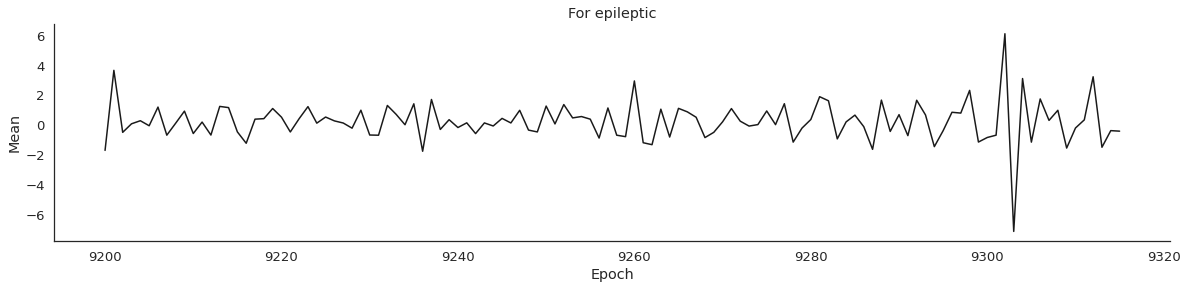

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Epoch'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

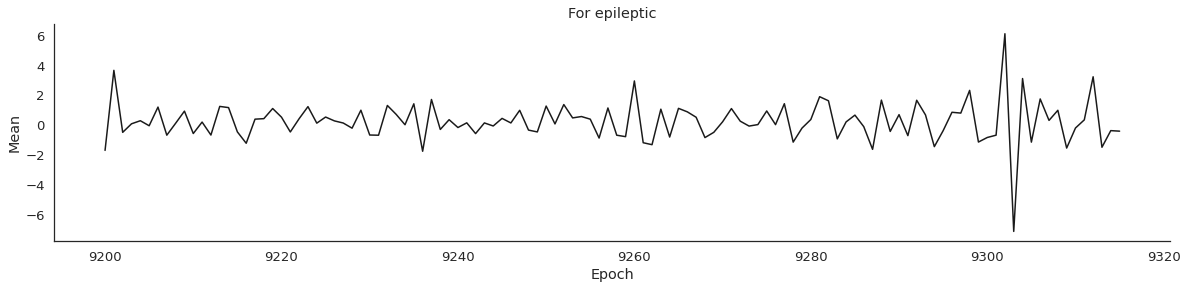

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Unnamed: 0'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
if 
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

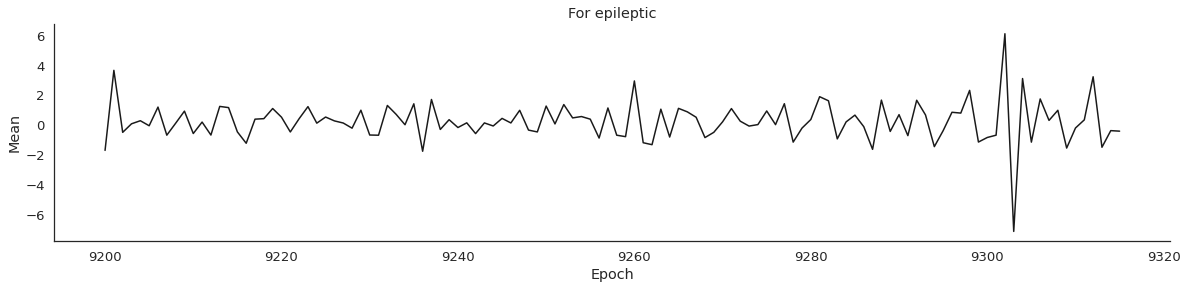

In [ ]:
data =(dv['Mean'][9200:9316])
time = (dv['Unnamed: 0'][9200:9316])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

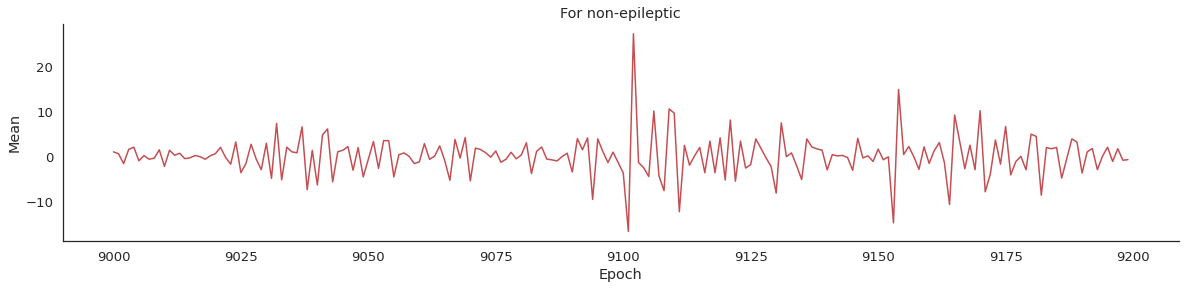

In [ ]:
data =(dv['Mean'][9000:9200])
time = (dv['Unnamed: 0'][9000:9200])
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plt.plot(time, data, lw=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('For non-epileptic')
#plt.axvline(x =2591200, ymin=0.25, color='red', linestyle='dotted', linewidth=5)
#plt.xlim([time.min(), time.max()])
#plt.title('EEG data (C3-P3)')
sns.despine()

In [ ]:
x = dv.drop(['Unnamed: 0','label'],axis = 1 )

In [ ]:
x.head()

,Mean,Median,Varience,Kurtosis,Skewness,Power,Entropy,Spectral_entropy,Zero_Crossing,Hust,Pfd,Mobility,Complexity
0,0.315702,0.195360,293.709609,0.650111,0.244237,243.584979,0.965375,0.563809,220,0.558105,1.017736,0.271387,4.215109
1,-0.477460,-0.195360,211.184635,0.006100,-0.011966,188.543474,1.096501,0.615209,286,0.712594,1.017939,0.332927,3.452487
2,0.660943,0.586081,266.924705,0.169350,-0.003543,261.199724,0.932692,0.571226,232,0.557736,1.016307,0.279366,3.739299
3,0.131595,0.586081,273.405297,-0.301960,-0.115292,254.919126,0.905237,0.545947,165,0.586204,1.015971,0.261617,3.996424
4,0.348210,0.976801,227.138812,0.494540,-0.034210,213.185964,0.929569,0.542437,206,0.606963,1.015467,0.268427,3.912735


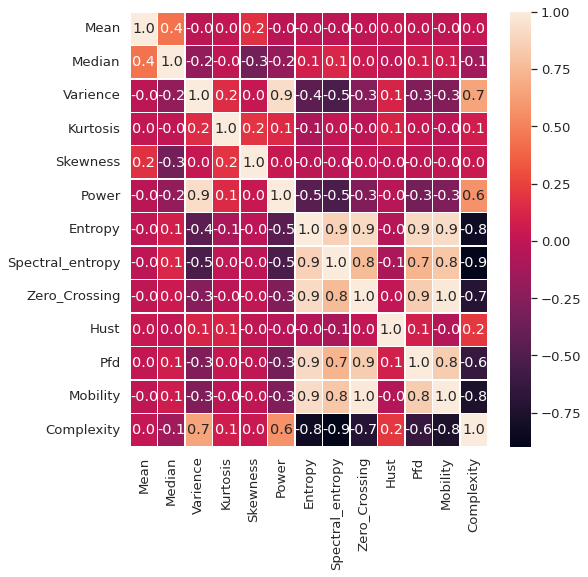

In [ ]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.savefig('feature_correlation')

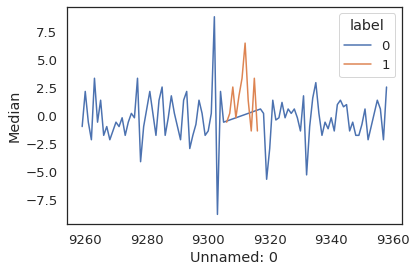

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Median',hue='label')

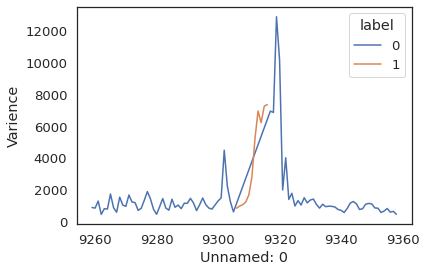

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Varience',hue='label')

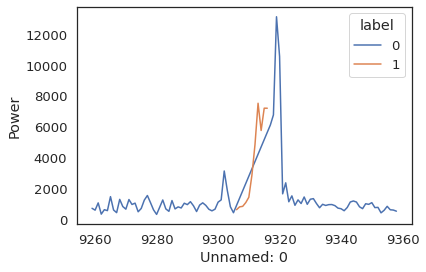

In [ ]:
sns.lineplot(data=dv[-100:], x="Unnamed: 0", y='Power',hue='label')

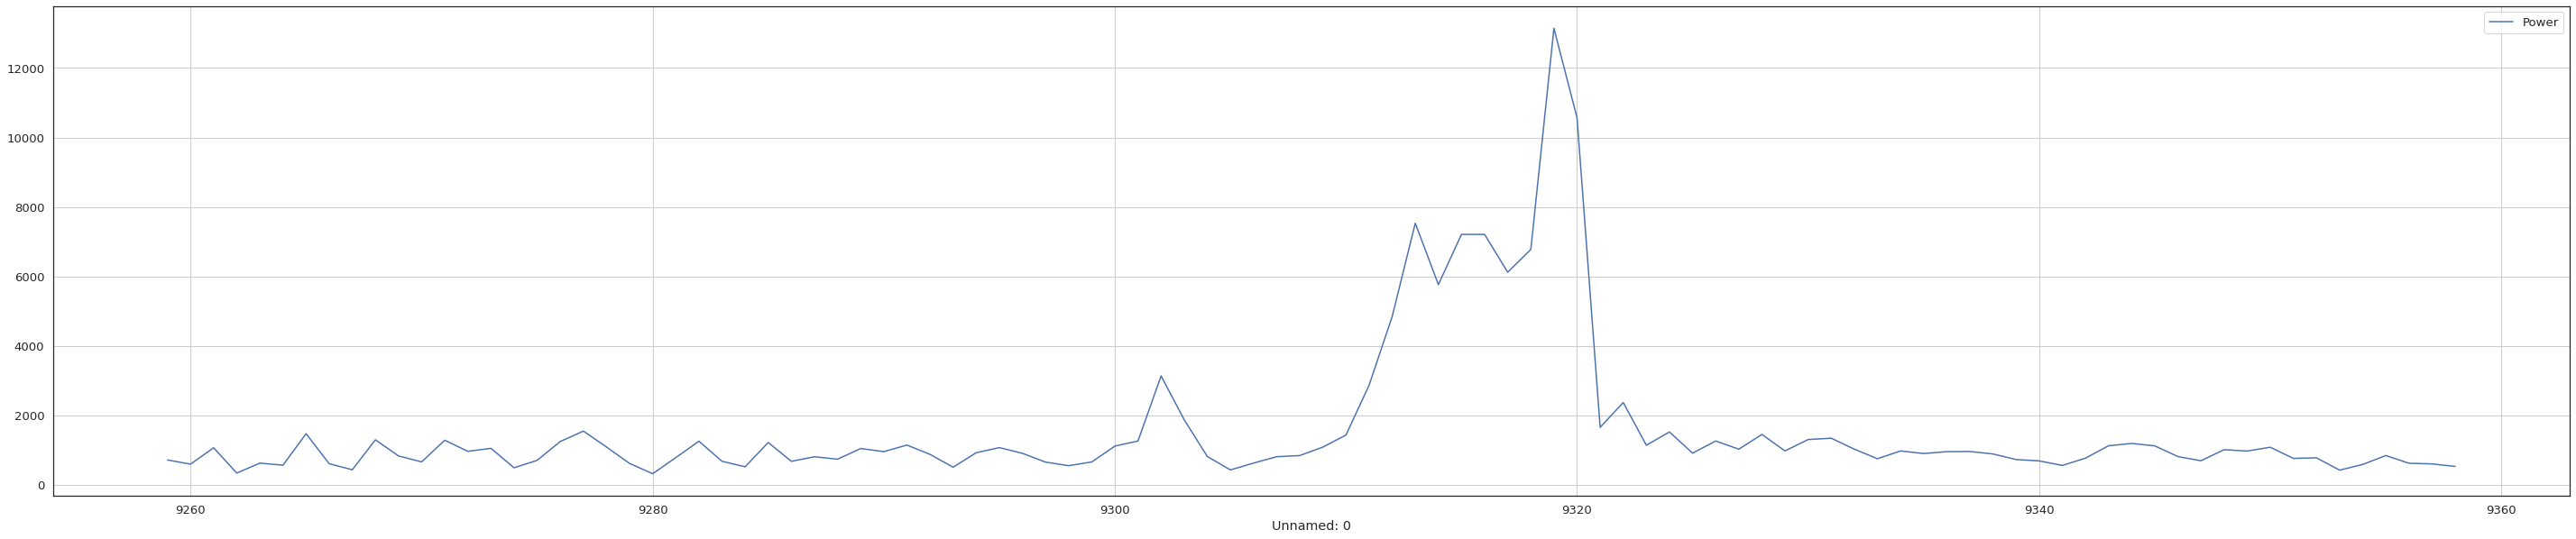

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Power'], figsize=(50,10), grid=True)

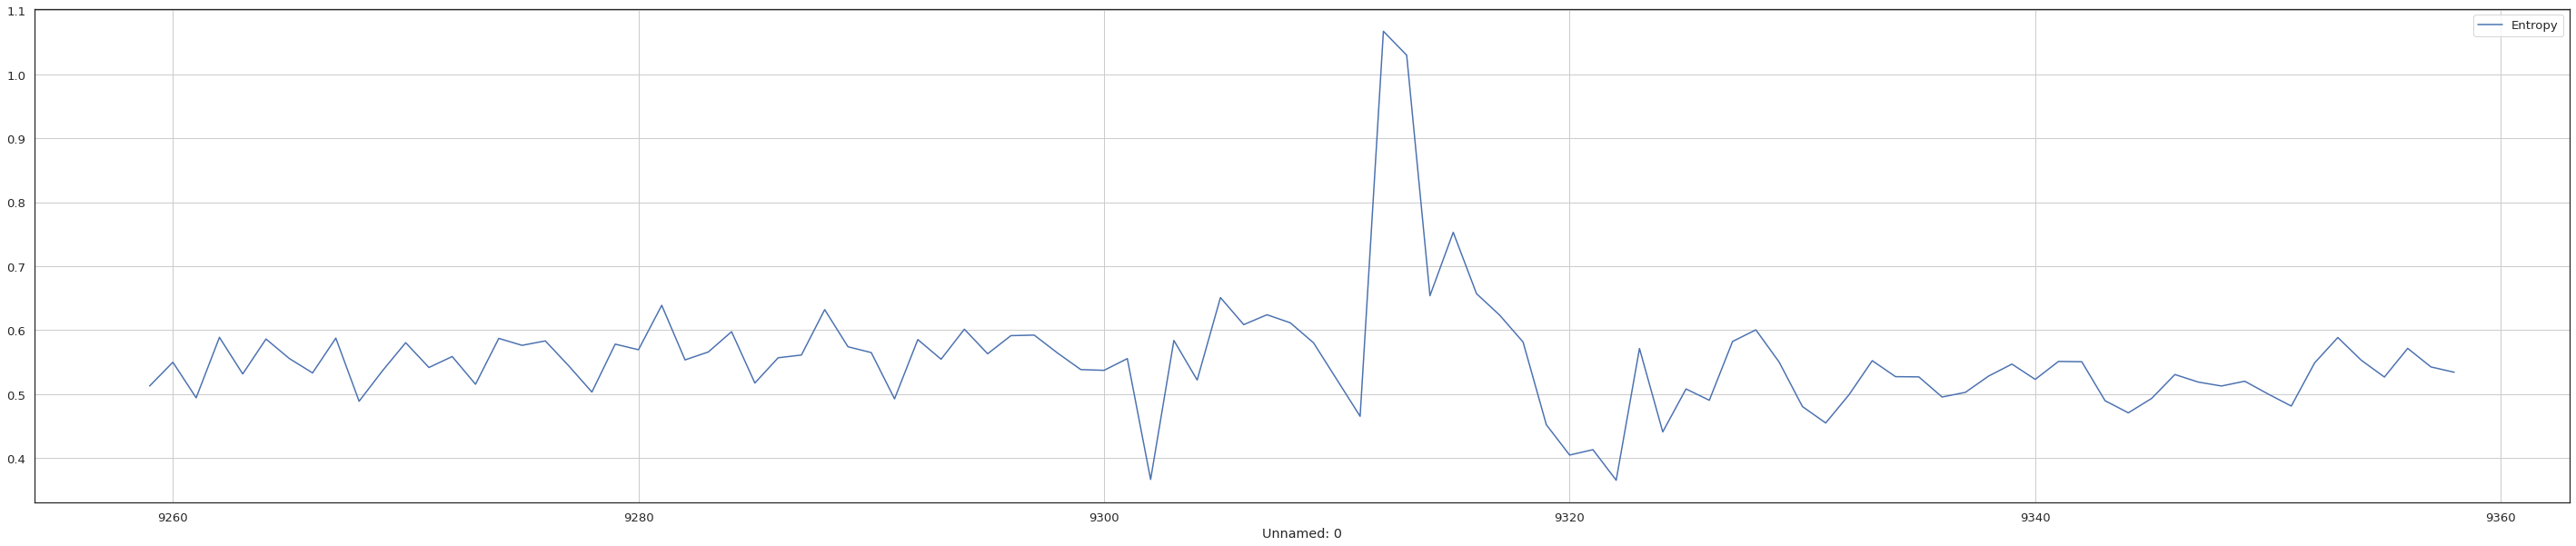

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Entropy'], figsize=(50,10), grid=True)

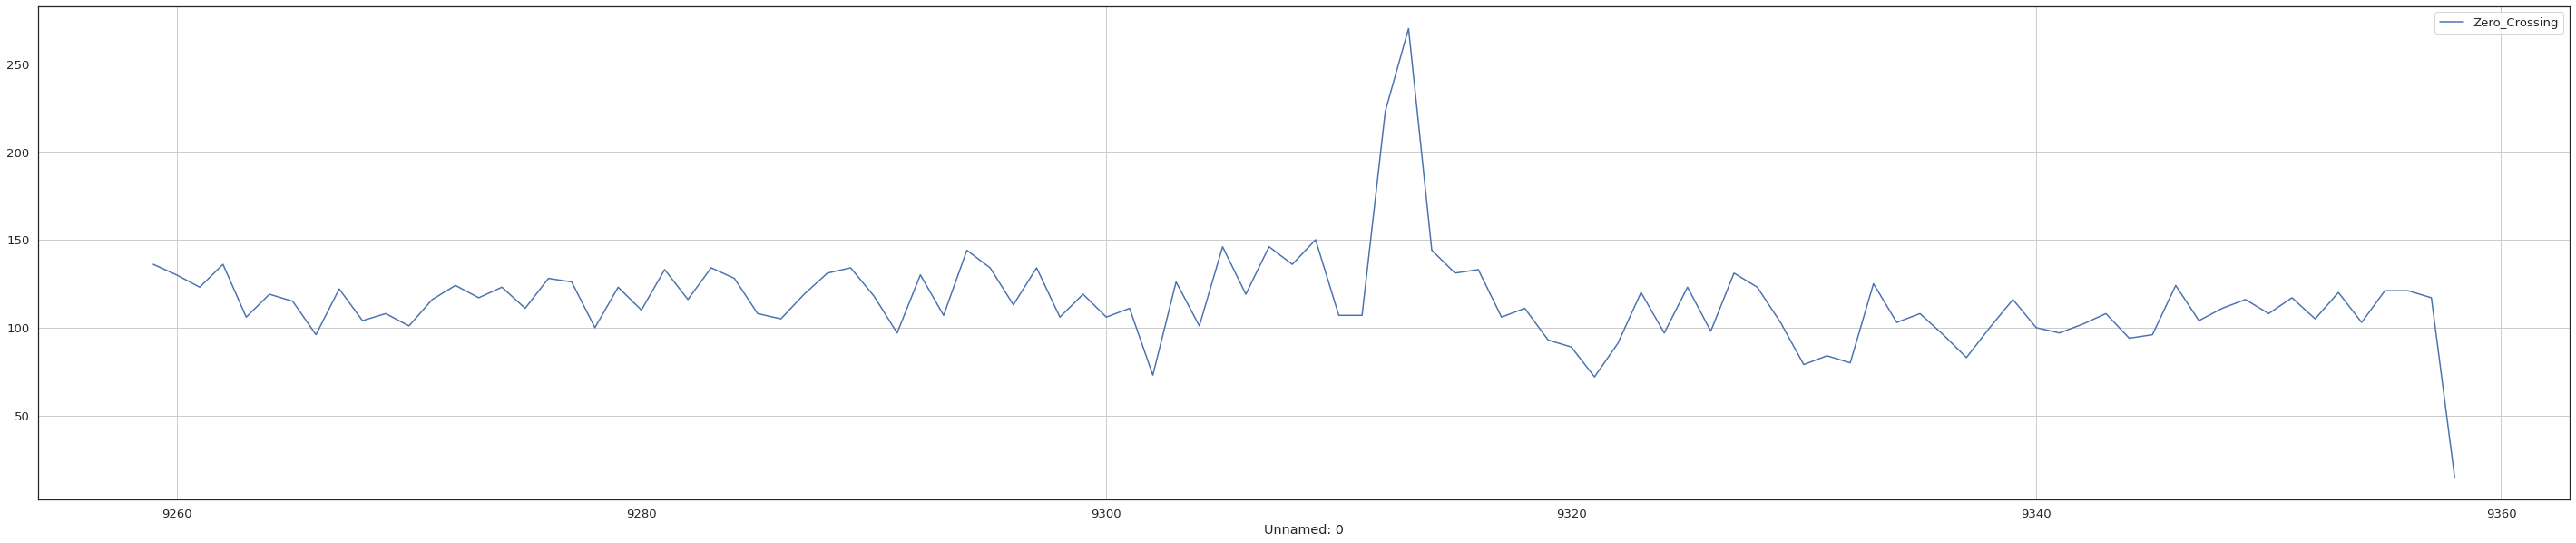

In [ ]:
dv[-100:].plot(x='Unnamed: 0', y=['Zero_Crossing'], figsize=(50,10), grid=True)

In [ ]:
epoch_df = pd.read_csv('/content/CHB_MIT_01_epoch.csv')

In [ ]:
epoch_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358
0,0,11.916972,0.195360,17.777778,16.605617,-7.619048,-12.698413,6.056166,2.539683,-8.791209,6.837607,-2.539683,10.744811,-13.479853,5.274725,3.321123,18.559219,1.758242,-23.247863,26.764347,15.042735,-9.181929,-12.698413,7.228327,11.135531,2.930403,-46.691087,-15.042735,-13.870574,11.916972,21.684982,-18.949939,25.592186,-0.586081,4.884005,-4.102564,18.559219,6.837607,-22.075702,-16.996337,...,107.252747,-49.816850,29.499389,44.737485,-40.048840,-62.710623,63.101343,-6.446886,-25.592186,33.797314,-67.008547,42.393162,-41.221001,0.586081,33.015873,-59.975580,34.188034,13.870574,15.433455,-34.578755,-11.135531,-44.346764,-25.592186,13.089133,5.665446,44.737485,27.545788,17.387057,8.400488,25.201465,-10.354090,-2.148962,-9.963370,58.803419,-1.367521,-13.479853,5.665446,-33.797314,-1.367521,16.996337
1,1,0.195360,2.539683,20.512821,11.916972,0.195360,-13.479853,9.181929,4.493284,-0.976801,4.493284,-2.930403,0.195360,-10.354090,0.195360,7.228327,13.479853,-2.148962,-28.717949,27.936508,9.181929,-9.181929,-13.479853,6.446886,2.148962,4.102564,-49.426129,-13.870574,-20.512821,15.042735,20.122100,-13.479853,13.479853,0.976801,6.446886,-5.665446,8.400488,12.698413,-23.638584,-16.214896,...,104.126984,-49.816850,34.188034,48.644689,-46.691087,-54.896215,65.054945,-4.493284,-23.638584,42.393162,-67.399267,48.644689,-48.253968,8.400488,33.406593,-58.803419,31.452991,14.261294,11.526252,-34.578755,-14.261294,-43.174603,-24.420024,12.698413,2.930403,42.393162,28.327228,20.903541,10.744811,22.466422,-8.400488,-0.586081,-14.652015,65.054945,-0.976801,-9.572650,0.195360,-32.625153,-1.367521,7.228327
2,2,0.195360,5.665446,18.559219,11.135531,5.274725,-14.261294,11.916972,-1.367521,0.195360,-2.148962,4.102564,-7.228327,-8.009768,-4.493284,7.619048,9.572650,-8.009768,-34.188034,32.234432,5.665446,-2.148962,-10.354090,9.572650,-1.758242,6.446886,-54.896215,-14.261294,-24.420024,19.731380,15.042735,-10.354090,4.102564,2.930403,6.446886,-7.619048,4.493284,17.777778,-24.029304,-17.387057,...,99.829060,-47.863248,35.750916,54.505495,-48.644689,-44.346764,66.617827,0.976801,-18.559219,43.956044,-67.789988,54.505495,-50.598291,11.526252,33.406593,-56.849817,32.625153,15.824176,9.181929,-33.797314,-11.916972,-36.141636,-23.638584,12.307692,2.539683,38.876679,27.936508,24.029304,17.777778,21.684982,-7.619048,-0.976801,-20.512821,67.008547,-2.539683,-7.619048,-0.976801,-30.280830,-4.102564,2.930403
3,3,0.195360,4.102564,18.168498,9.181929,6.837607,-14.652015,19.731380,-5.665446,-1.758242,-2.930403,8.400488,-8.009768,-4.884005,-9.963370,11.135531,9.572650,-9.572650,-33.015873,38.485958,5.665446,0.976801,-8.009768,10.354090,-5.665446,8.400488,-57.240537,-9.572650,-14.261294,15.824176,7.228327,-3.321123,-0.976801,2.148962,7.228327,-9.572650,1.758242,18.949939,-22.075702,-15.042735,...,97.094017,-49.035409,36.141636,65.836386,-47.863248,-36.923077,66.617827,8.400488,-12.698413,30.280830,-71.697192,62.319902,-49.035409,16.605617,35.360195,-51.379731,33.015873,15.824176,5.665446,-26.764347,-11.916972,-31.062271,-24.420024,15.042735,0.976801,33.797314,28.717949,27.155067,26.373626,20.122100,-6.056166,-0.976801,-26.373626,62.319902,-2.930403,-4.884005,-0.195360,-30.671551,-4.493284,5.665446
4,4,0.195360,-1.758242,13.870574,9.181929,10.744811,-15.824176,25.201465,-3.711844,0.586081,-3.321123,9.181929,-8.791209,-1.758242,-12.307692,7.619048,5.665446,-5.274725,-31.062271,34.188034,7.228327,5.274725,-4.493284,7.228327,-4.493284,8.791209,-62.710623,-13.479853,-14.261294,9.963370,6.056166,-6.056166,-2.930403,1.367521,6.837607,-13.089133,2.930403,22.857143,-27.936508,-21.294261,...,92.405372,-50.598291,39.267399,75.604396,-46.300366,-31.843712,60.757021,